In [1]:
# Some of the code refered from: https://www.kaggle.com/svpons/feature-engineering

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn as sk
#import pickle
import datetime
from datetime import date
#import os
import seaborn as sns
from sklearn.preprocessing import *
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import StratifiedShuffleSplit
import seaborn as sns
%matplotlib inline

#### Session Data

In [3]:
df_sessions = pd.read_csv('./Airbnb/sessions.csv')
df_sessions['id'] = df_sessions['user_id']
df_sessions = df_sessions.drop(['user_id'],axis=1)

In [4]:
df_sessions.head(10)

,action,action_type,action_detail,device_type,secs_elapsed,id
0,lookup,NaN,NaN,Windows Desktop,319.0,d1mm9tcy42
1,search_results,click,view_search_results,Windows Desktop,67753.0,d1mm9tcy42
2,lookup,NaN,NaN,Windows Desktop,301.0,d1mm9tcy42
3,search_results,click,view_search_results,Windows Desktop,22141.0,d1mm9tcy42
4,lookup,NaN,NaN,Windows Desktop,957.0,jpmpj40cvk
5,search_results,click,view_search_results,Windows Desktop,965.0,jpmpj40cvk
6,search_results,click,view_search_results,Windows Desktop,1021.0,jpmpj40cvk
7,search_results,click,view_search_results,Windows Desktop,938.0,jpmpj40cvk
8,search_results,click,view_search_results,Windows Desktop,2702.0,jpmpj40cvk
9,ajax_refresh_subtotal,click,change_trip_characteristics,Windows Desktop,674.0,jpmpj40cvk


In [5]:
df_sessions.shape

(1048575, 6)

In [6]:
df_sessions.isnull().sum()

action             7873
action_type      143097
action_detail    143097
device_type           0
secs_elapsed      11067
id                 2797
dtype: int64

In [7]:
df_sessions.head(10)

,action,action_type,action_detail,device_type,secs_elapsed,id
0,lookup,NaN,NaN,Windows Desktop,319.0,d1mm9tcy42
1,search_results,click,view_search_results,Windows Desktop,67753.0,d1mm9tcy42
2,lookup,NaN,NaN,Windows Desktop,301.0,d1mm9tcy42
3,search_results,click,view_search_results,Windows Desktop,22141.0,d1mm9tcy42
4,lookup,NaN,NaN,Windows Desktop,957.0,jpmpj40cvk
5,search_results,click,view_search_results,Windows Desktop,965.0,jpmpj40cvk
6,search_results,click,view_search_results,Windows Desktop,1021.0,jpmpj40cvk
7,search_results,click,view_search_results,Windows Desktop,938.0,jpmpj40cvk
8,search_results,click,view_search_results,Windows Desktop,2702.0,jpmpj40cvk
9,ajax_refresh_subtotal,click,change_trip_characteristics,Windows Desktop,674.0,jpmpj40cvk


##### Preparing Session data

In [8]:
print('Working on Session data...')
#Filling nan with value ('NAN')
df_sessions.action = df_sessions.action.fillna('NAN')
df_sessions.action_type = df_sessions.action_type.fillna('NAN')
df_sessions.action_detail = df_sessions.action_detail.fillna('NAN')
df_sessions.device_type = df_sessions.device_type.fillna('NAN')

Working on Session data...


In [9]:
#act = dict(zip(df_sessions.action.value_counts().index,df_sessions.action.value_counts().values))
np.unique(df_sessions.action, return_counts=True)

(array(['10', '11', '12', '15', 'NAN', 'about_us', 'account', 'active',
        'add_guests', 'add_note', 'airbnb_picks', 'ajax_check_dates',
        'ajax_get_referrals_amt', 'ajax_get_results',
        'ajax_google_translate', 'ajax_google_translate_description',
        'ajax_google_translate_reviews', 'ajax_image_upload',
        'ajax_lwlb_contact', 'ajax_payout_edit',
        'ajax_payout_options_by_country', 'ajax_photo_widget',
        'ajax_photo_widget_form_iframe', 'ajax_price_and_availability',
        'ajax_refresh_subtotal', 'ajax_send_message', 'ajax_statsd',
        'ajax_worth', 'apply', 'apply_code', 'apply_reservation',
        'ask_question', 'at_checkpoint', 'authenticate', 'authorize',
        'available', 'badge', 'become_user', 'calendar_tab_inner2',
        'callback', 'campaigns', 'cancel', 'cancellation_policies',
        'change', 'change_availability', 'change_currency',
        'change_default_payout', 'change_password', 'city_count',
        'clear_reserv

In [10]:
#Action values with low frequency are changed to 'OTHER'

act_freq = 100  #Threshold of frequency
act = dict(zip(*np.unique(df_sessions.action, return_counts=True)))
df_sessions.action = df_sessions.action.apply(lambda x: 'OTHER' if act[x] < act_freq else x)

#### zip的用法

In [11]:
a=[1,2,3]
b=[4,5,6]

In [12]:
list(zip(a,b))

[(1, 4), (2, 5), (3, 6)]

In [13]:
c=[11,12]

In [14]:
list(zip(a,b,c))
abc=list(zip(a,b,c))

In [15]:
list(zip(*abc))

[(1, 2), (4, 5), (11, 12)]

#### argsort 的用法

In [16]:
x=np.array([1,6,3,-1,2,4])
x.argsort()

array([3, 0, 4, 2, 5, 1], dtype=int64)

In [17]:
df_sessions.action.value_counts().shape

(117,)

In [18]:
#Computing value_counts

f_act = df_sessions.action.value_counts().argsort()
f_act_detail = df_sessions.action_detail.value_counts().argsort()
f_act_type = df_sessions.action_type.value_counts().argsort()
f_dev_type = df_sessions.device_type.value_counts().argsort()

In [19]:
print(f_act.shape)
print(f_act_detail.shape)
print(f_act_type.shape)
print(f_dev_type.shape)

(117,)
(108,)
(10,)
(14,)


In [20]:
#grouping session by id. We will compute features from all rows with the same id.
dgr_sess = df_sessions.groupby(['id'])

In [21]:
len(dgr_sess)

15588

In [22]:
df_sessions.shape

(1048575, 6)

In [23]:
f_act['header_userpic']

107

In [24]:
#Loop on dgr_sess to create all the features.
samples = []
cont = 0
ln = len(dgr_sess)

for g in dgr_sess:
    if cont%10000 == 0:
        print("%s from %s" %(cont, ln))
    gr = g[1]   #data frame that comtains all the data for a groupby value 'zzywmcn0jv'
    
    l = []
    
    #the id    for example:'zzywmcn0jv'
    l.append(g[0])
    
    # number of total actions
    l.append(len(gr))
    
    sev = gr.secs_elapsed.fillna(0).values   #These values are used later.
    
    #action features
    #(how many times each value occurs, numb of unique values, mean and std)
    c_act = [0] * len(f_act)
    for i,v in enumerate(gr.action.values):
        c_act[f_act[v]] += 1
    _, c_act_uqc = np.unique(gr.action.values, return_counts=True)
    c_act += [len(c_act_uqc), np.mean(c_act_uqc), np.std(c_act_uqc)]
    l = l + c_act
    
    #action_detail features
    #(how many times each value occurs, numb of unique values, mean and std)
    c_act_detail = [0] * len(f_act_detail)
    for i,v in enumerate(gr.action_detail.values):
        c_act_detail[f_act_detail[v]] += 1 
    _, c_act_det_uqc = np.unique(gr.action_detail.values, return_counts=True)
    c_act_detail += [len(c_act_det_uqc), np.mean(c_act_det_uqc), np.std(c_act_det_uqc)]
    l = l + c_act_detail
    
    #action_type features
    #(how many times each value occurs, numb of unique values, mean and std
    #+ log of the sum of secs_elapsed for each value)
    l_act_type = [0] * len(f_act_type)
    c_act_type = [0] * len(f_act_type)
    for i,v in enumerate(gr.action_type.values):
        l_act_type[f_act_type[v]] += sev[i]   
        c_act_type[f_act_type[v]] += 1  
    l_act_type = np.log(1 + np.array(l_act_type)).tolist()
    _, c_act_type_uqc = np.unique(gr.action_type.values, return_counts=True)
    c_act_type += [len(c_act_type_uqc), np.mean(c_act_type_uqc), np.std(c_act_type_uqc)]
    l = l + c_act_type + l_act_type    
    
    #device_type features
    #(how many times each value occurs, numb of unique values, mean and std)
    c_dev_type  = [0] * len(f_dev_type)
    for i,v in enumerate(gr.device_type .values):
        c_dev_type[f_dev_type[v]] += 1 
    c_dev_type.append(len(np.unique(gr.device_type.values)))
    _, c_dev_type_uqc = np.unique(gr.device_type.values, return_counts=True)
    c_dev_type += [len(c_dev_type_uqc), np.mean(c_dev_type_uqc), np.std(c_dev_type_uqc)]        
    l = l + c_dev_type    
    
    #secs_elapsed features        
    l_secs = [0] * 5 
    l_log = [0] * 15
    if len(sev) > 0:
        #Simple statistics about the secs_elapsed values.
        l_secs[0] = np.log(1 + np.sum(sev))
        l_secs[1] = np.log(1 + np.mean(sev)) 
        l_secs[2] = np.log(1 + np.std(sev))
        l_secs[3] = np.log(1 + np.median(sev))
        l_secs[4] = l_secs[0] / float(l[1])
        
        #Values are grouped in 15 intervals. Compute the number of values
        #in each interval.
        log_sev = np.log(1 + sev).astype(int)
        l_log = np.bincount(log_sev, minlength=15).tolist()                      
    l = l + l_secs + l_log
    
    #The list l has the feature values of one sample.
    samples.append(l)
    cont += 1

0 from 15588
10000 from 15588


In [25]:
len(samples)

15588

In [26]:
#returns of list by ids   [[],[],[]....[]]

In [27]:
#preparing objects    
samples = np.array(samples)
samp_ar = samples[:, 1:].astype(np.float16)
samp_id = samples[:, 0]   #The first element in obs is the id of the sample.

In [28]:
#Creating a dataframe with the computed features    
col_names = []    #name of the columns
for i in range(len(samples[0])-1):
    col_names.append('c_' + str(i)) 

In [29]:
#creating the dataframe        
df_agg_sess = pd.DataFrame(samp_ar, columns=col_names)
df_agg_sess['id'] = samp_id
df_agg_sess.index = df_agg_sess.id

In [30]:
df_agg_sess.shape

(15588, 294)

In [31]:
df_agg_sess.head(10)

,c_0,c_1,c_2,c_3,c_4,c_5,c_6,c_7,c_8,c_9,...,c_284,c_285,c_286,c_287,c_288,c_289,c_290,c_291,c_292,id
id,,,,,,,,,,,,,,,,,,,,,
007gj7kqdk,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.0,0.0,2.0,1.0,2.0,0.0,1.0,0.0,0.0,007gj7kqdk
009a40t3dk,26.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.0,4.0,4.0,5.0,2.0,1.0,1.0,2.0,0.0,009a40t3dk
00allnceb8,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,00allnceb8
00e8bokexa,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,00e8bokexa
00fhpdik5t,27.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,5.0,2.0,10.0,4.0,3.0,0.0,0.0,0.0,0.0,00fhpdik5t
00fn6wu77e,36.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,9.0,4.0,5.0,5.0,3.0,1.0,0.0,2.0,0.0,00fn6wu77e
00fyswof3k,57.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,7.0,4.0,4.0,11.0,16.0,8.0,3.0,1.0,0.0,00fyswof3k
00guzlz8b8,38.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6.0,8.0,2.0,4.0,4.0,6.0,4.0,1.0,0.0,00guzlz8b8
00iapy7gb3,16.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,3.0,2.0,2.0,1.0,1.0,0.0,1.0,0.0,00iapy7gb3


#### Finish cleaning of sessions

#### training and testing data

In [32]:
train = pd.read_csv("train_users_2.csv")
test = pd.read_csv("test_users.csv")

In [33]:
train.shape

(213451, 16)

In [34]:
test.shape

(62096, 15)

In [35]:
train.head(10)

,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,country_destination
0,gxn3p5htnn,2010-06-28,20090319043255,NaN,-unknown-,NaN,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,NDF
1,820tgsjxq7,2011-05-25,20090523174809,NaN,MALE,38.0,facebook,0,en,seo,google,untracked,Web,Mac Desktop,Chrome,NDF
2,4ft3gnwmtx,2010-09-28,20090609231247,2010-08-02,FEMALE,56.0,basic,3,en,direct,direct,untracked,Web,Windows Desktop,IE,US
3,bjjt8pjhuk,2011-12-05,20091031060129,2012-09-08,FEMALE,42.0,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Firefox,other
4,87mebub9p4,2010-09-14,20091208061105,2010-02-18,-unknown-,41.0,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,US
5,osr2jwljor,2010-01-01,20100101215619,2010-01-02,-unknown-,NaN,basic,0,en,other,other,omg,Web,Mac Desktop,Chrome,US
6,lsw9q7uk0j,2010-01-02,20100102012558,2010-01-05,FEMALE,46.0,basic,0,en,other,craigslist,untracked,Web,Mac Desktop,Safari,US
7,0d01nltbrs,2010-01-03,20100103191905,2010-01-13,FEMALE,47.0,basic,0,en,direct,direct,omg,Web,Mac Desktop,Safari,US
8,a1vcnhxeij,2010-01-04,20100104004211,2010-07-29,FEMALE,50.0,basic,0,en,other,craigslist,untracked,Web,Mac Desktop,Safari,US
9,6uh8zyj2gn,2010-01-04,20100104023758,2010-01-04,-unknown-,46.0,basic,0,en,other,craigslist,omg,Web,Mac Desktop,Firefox,US


In [36]:
train.dtypes

id                          object
date_account_created        object
timestamp_first_active       int64
date_first_booking          object
gender                      object
age                        float64
signup_method               object
signup_flow                  int64
language                    object
affiliate_channel           object
affiliate_provider          object
first_affiliate_tracked     object
signup_app                  object
first_device_type           object
first_browser               object
country_destination         object
dtype: object

In [37]:
print ('training dataset ({} rows) null value:\n'.format(train.shape[0]))
print (train.isnull().sum(axis = 0))
print ('\n' + '***' * 10 + '\n')
print ('test dataset ({} rows) null value:\n'.format(test.shape[0]))
print (test.isnull().sum(axis = 0))

training dataset (213451 rows) null value:

id                              0
date_account_created            0
timestamp_first_active          0
date_first_booking         124543
gender                          0
age                         87990
signup_method                   0
signup_flow                     0
language                        0
affiliate_channel               0
affiliate_provider              0
first_affiliate_tracked      6065
signup_app                      0
first_device_type               0
first_browser                   0
country_destination             0
dtype: int64

******************************

test dataset (62096 rows) null value:

id                             0
date_account_created           0
timestamp_first_active         0
date_first_booking         62096
gender                         0
age                        28876
signup_method                  0
signup_flow                    0
language                       0
affiliate_channel             

In [38]:
train_row = train.shape[0]

# The label we need to predict
labels = train['country_destination'].values

# the id number is not useful for prediction. We need it for submission
id_test = test['id']

# drop the id column
# drop the date_first_booking since there is all Nan in test dataset which we figured out in the data exploration
# drop the label in training set
train.drop(['country_destination', 'date_first_booking'], axis = 1, inplace = True)
test.drop(['date_first_booking'], axis = 1, inplace = True)

In [39]:
labels

array(['NDF', 'NDF', 'US', ..., 'NDF', 'NDF', 'NDF'], dtype=object)

#### preparing training and testing data

In [40]:
# join the two dataset first. Need one hot encoding

# We may have a few things to deal with:

# 1. date_account_created: create some new features
# 2. timestamp_first_active: convert it to datetime data type
# 3. age column
# 4. one hot encoding the other features

In [41]:
df = pd.concat([train, test], axis = 0, ignore_index = True)
df.shape

(275547, 14)

#### timestamp_first_active

In [42]:
tfa = df.timestamp_first_active.astype(str).apply(lambda x: datetime.datetime(int(x[:4]),
                                                                          int(x[4:6]), 
                                                                          int(x[6:8]),
                                                                          int(x[8:10]),
                                                                          int(x[10:12]),
                                                                          int(x[12:])))

In [43]:
tfa.head(10)

0   2009-03-19 04:32:55
1   2009-05-23 17:48:09
2   2009-06-09 23:12:47
3   2009-10-31 06:01:29
4   2009-12-08 06:11:05
5   2010-01-01 21:56:19
6   2010-01-02 01:25:58
7   2010-01-03 19:19:05
8   2010-01-04 00:42:11
9   2010-01-04 02:37:58
Name: timestamp_first_active, dtype: datetime64[ns]

In [44]:
# try to create some features:
# numerical: year, month, day; time difference between dac and tfa;
# categorical: which season; weekday or weekend?
#?
#...


In [45]:
df.head(5)

,id,date_account_created,timestamp_first_active,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser
0,gxn3p5htnn,2010-06-28,20090319043255,-unknown-,NaN,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome
1,820tgsjxq7,2011-05-25,20090523174809,MALE,38.0,facebook,0,en,seo,google,untracked,Web,Mac Desktop,Chrome
2,4ft3gnwmtx,2010-09-28,20090609231247,FEMALE,56.0,basic,3,en,direct,direct,untracked,Web,Windows Desktop,IE
3,bjjt8pjhuk,2011-12-05,20091031060129,FEMALE,42.0,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Firefox
4,87mebub9p4,2010-09-14,20091208061105,-unknown-,41.0,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome


In [46]:
# create tfa_year, tfa_month, tfa_day feature
df['tfa_year'] = np.array([x.year for x in tfa])
df['tfa_month'] = np.array([x.month for x in tfa])
df['tfa_day'] = np.array([x.day for x in tfa])

In [47]:
df.columns

Index(['id', 'date_account_created', 'timestamp_first_active', 'gender', 'age',
       'signup_method', 'signup_flow', 'language', 'affiliate_channel',
       'affiliate_provider', 'first_affiliate_tracked', 'signup_app',
       'first_device_type', 'first_browser', 'tfa_year', 'tfa_month',
       'tfa_day'],
      dtype='object')

In [48]:
# create features of weekday
df['tfa_wd'] = np.array([x.isoweekday() for x in tfa])
df_tfa_wd = pd.get_dummies(df.tfa_wd, prefix = 'tfa_wd')  # one hot encoding 
df = pd.concat((df, df_tfa_wd), axis = 1)
df.drop(['tfa_wd'], axis = 1, inplace = True)
df.head(3)

,id,date_account_created,timestamp_first_active,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,...,tfa_year,tfa_month,tfa_day,tfa_wd_1,tfa_wd_2,tfa_wd_3,tfa_wd_4,tfa_wd_5,tfa_wd_6,tfa_wd_7
0,gxn3p5htnn,2010-06-28,20090319043255,-unknown-,NaN,facebook,0,en,direct,direct,...,2009,3,19,0,0,0,1,0,0,0
1,820tgsjxq7,2011-05-25,20090523174809,MALE,38.0,facebook,0,en,seo,google,...,2009,5,23,0,0,0,0,0,1,0
2,4ft3gnwmtx,2010-09-28,20090609231247,FEMALE,56.0,basic,3,en,direct,direct,...,2009,6,9,0,1,0,0,0,0,0


In [49]:
Y = 2000 # dummy leap year to allow input X-02-29 (leap day)
seasons = [(0, (date(Y,  1,  1),  date(Y,  3, 20))),  #'winter'
           (1, (date(Y,  3, 21),  date(Y,  6, 20))),  #'spring'
           (2, (date(Y,  6, 21),  date(Y,  9, 22))),  #'summer'
           (3, (date(Y,  9, 23),  date(Y, 12, 20))),  #'autumn'
           (0, (date(Y, 12, 21),  date(Y, 12, 31)))]  #'winter'

In [50]:
def get_season(dt):
    dt = dt.date()
    dt = dt.replace(year=Y)
    return next(season for season, (start, end) in seasons
                if start <= dt <= end)

#tfa['season_tfa'] = np.array([get_season(dt) for dt in tfa])
#tfa.drop(['season_tfa'])

In [51]:
#tfa=tfa.drop(['season_tfa'])

In [52]:
'''
def get_season(dt):
    dt = dt.date()
    # dt must be a datetime type
    if dt.month in [3,4,5]:
        return 'Spring'    # spring
    elif dt.month in [6,7,8]:
        return 'Summer'    # summer
    elif dt.month in [9,10,11]:
        return 'Fall'    # fall
    else:
        return 'Winter'    # winter
'''

    

"\ndef get_season(dt):\n    dt = dt.date()\n    # dt must be a datetime type\n    if dt.month in [3,4,5]:\n        return 'Spring'    # spring\n    elif dt.month in [6,7,8]:\n        return 'Summer'    # summer\n    elif dt.month in [9,10,11]:\n        return 'Fall'    # fall\n    else:\n        return 'Winter'    # winter\n"

In [53]:
df['tfa_season'] = np.array([get_season(x) for x in tfa])
df_tfa_season = pd.get_dummies(df.tfa_season, prefix = 'tfa_season')
df = pd.concat((df, df_tfa_season), axis = 1)
df.drop(['tfa_season'], axis = 1, inplace = True)
df.head()

,id,date_account_created,timestamp_first_active,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,...,tfa_wd_2,tfa_wd_3,tfa_wd_4,tfa_wd_5,tfa_wd_6,tfa_wd_7,tfa_season_0,tfa_season_1,tfa_season_2,tfa_season_3
0,gxn3p5htnn,2010-06-28,20090319043255,-unknown-,NaN,facebook,0,en,direct,direct,...,0,0,1,0,0,0,1,0,0,0
1,820tgsjxq7,2011-05-25,20090523174809,MALE,38.0,facebook,0,en,seo,google,...,0,0,0,0,1,0,0,1,0,0
2,4ft3gnwmtx,2010-09-28,20090609231247,FEMALE,56.0,basic,3,en,direct,direct,...,1,0,0,0,0,0,0,1,0,0
3,bjjt8pjhuk,2011-12-05,20091031060129,FEMALE,42.0,facebook,0,en,direct,direct,...,0,0,0,0,1,0,0,0,0,1
4,87mebub9p4,2010-09-14,20091208061105,-unknown-,41.0,basic,0,en,direct,direct,...,1,0,0,0,0,0,0,0,0,1


#### date_account_created

In [54]:
dac = pd.to_datetime(df.date_account_created)

In [55]:
# create year, month, day feature for dac

df['dac_year'] = np.array([x.year for x in dac])
df['dac_month'] = np.array([x.month for x in dac])
df['dac_day'] = np.array([x.day for x in dac])

In [56]:
# create features of weekday for dac

df['dac_wd'] = np.array([x.isoweekday() for x in dac])
df_dac_wd = pd.get_dummies(df.dac_wd, prefix = 'dac_wd')
df = pd.concat((df, df_dac_wd), axis = 1)
df.drop(['dac_wd'], axis = 1, inplace = True)
# df.head()

In [57]:
# create season features fro dac

df['dac_season'] = np.array([get_season(x) for x in dac])
df_dac_season = pd.get_dummies(df.dac_season, prefix = 'dac_season')
df = pd.concat((df, df_dac_season), axis = 1)
df.drop(['dac_season'], axis = 1, inplace = True)
df.head()

,id,date_account_created,timestamp_first_active,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,...,dac_wd_2,dac_wd_3,dac_wd_4,dac_wd_5,dac_wd_6,dac_wd_7,dac_season_0,dac_season_1,dac_season_2,dac_season_3
0,gxn3p5htnn,2010-06-28,20090319043255,-unknown-,NaN,facebook,0,en,direct,direct,...,0,0,0,0,0,0,0,0,1,0
1,820tgsjxq7,2011-05-25,20090523174809,MALE,38.0,facebook,0,en,seo,google,...,0,1,0,0,0,0,0,1,0,0
2,4ft3gnwmtx,2010-09-28,20090609231247,FEMALE,56.0,basic,3,en,direct,direct,...,1,0,0,0,0,0,0,0,0,1
3,bjjt8pjhuk,2011-12-05,20091031060129,FEMALE,42.0,facebook,0,en,direct,direct,...,0,0,0,0,0,0,0,0,0,1
4,87mebub9p4,2010-09-14,20091208061105,-unknown-,41.0,basic,0,en,direct,direct,...,1,0,0,0,0,0,0,0,1,0


##### Time span between dac and tfa may also be used as a feature

In [58]:
dt_span = dac.subtract(tfa).dt.days

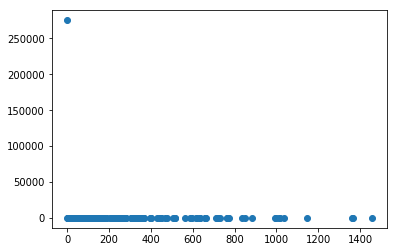

In [59]:
# there are many -1 days exsiting which means dac very close to tfa.
plt.scatter(dt_span.value_counts().index.values, dt_span.value_counts().values)


In [60]:
dt_span.unique()

array([ 465,  731,  475,  764,  279,   -1,  311,  100,    6,  261,  355,
        215, 1368,    5,  162, 1455,  664,  307, 1360,  353,  273,  217,
         75,  348,  850,  994,    1,  997,  153, 1035,  615,  721,  515,
       1010, 1147,   19,  767,   90,  447,   12,    3,  336,  398,  709,
       1017,  327,    0,    2,  310,  240,   77,  717,  303,  258,  302,
         61,  657,  837,  166,  506,  238,  400,  282,  881,  635,   36,
        450,   15,  564,  633,  357,  136,  313,   94,  773,  168,   30,
        203,  762,  586,   39,   56,  124,  123,   46,  175,  658,  594,
        513,   17,   43,   85,  430,  128,  321,  621,  233,   79,    4,
        137,   64,   28,  394,   91,  152,   10,  437,  102,  366,  368,
        446,  363,  132,  209,  361,  236,  117,  248,   16,  142,  115,
        107,  228,  330,   73,  149,  145,  358,  188,  257,    8,  103,
         45,  178,    9,  131,  245,  242,   34,   20,  105,  110,  143],
      dtype=int64)

In [61]:
# create categorical feature: span = -1; -1 < span < 30; 31 < span < 365; span > 365
def get_span(dt):
    # dt is an integer
    if dt == -1:
        return 'OneDay'
    elif (dt < 30) & (dt > -1):
        return 'OneMonth'
    elif (dt >= 30) & (dt <= 365):
        return 'OneYear'
    else:
        return 'other'

In [62]:
df['dt_span'] = np.array([get_span(x) for x in dt_span])
df_dt_span = pd.get_dummies(df.dt_span, prefix = 'dt_span')
df = pd.concat((df, df_dt_span), axis = 1)
df.drop(['dt_span'], axis = 1, inplace = True)
df.head()

,id,date_account_created,timestamp_first_active,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,...,dac_wd_6,dac_wd_7,dac_season_0,dac_season_1,dac_season_2,dac_season_3,dt_span_OneDay,dt_span_OneMonth,dt_span_OneYear,dt_span_other
0,gxn3p5htnn,2010-06-28,20090319043255,-unknown-,NaN,facebook,0,en,direct,direct,...,0,0,0,0,1,0,0,0,0,1
1,820tgsjxq7,2011-05-25,20090523174809,MALE,38.0,facebook,0,en,seo,google,...,0,0,0,1,0,0,0,0,0,1
2,4ft3gnwmtx,2010-09-28,20090609231247,FEMALE,56.0,basic,3,en,direct,direct,...,0,0,0,0,0,1,0,0,0,1
3,bjjt8pjhuk,2011-12-05,20091031060129,FEMALE,42.0,facebook,0,en,direct,direct,...,0,0,0,0,0,1,0,0,0,1
4,87mebub9p4,2010-09-14,20091208061105,-unknown-,41.0,basic,0,en,direct,direct,...,0,0,0,0,1,0,0,0,1,0


In [63]:
# drop the time feature after feature engineering
df.drop(['date_account_created','timestamp_first_active'], axis = 1, inplace = True)

In [64]:
df.columns

Index(['id', 'gender', 'age', 'signup_method', 'signup_flow', 'language',
       'affiliate_channel', 'affiliate_provider', 'first_affiliate_tracked',
       'signup_app', 'first_device_type', 'first_browser', 'tfa_year',
       'tfa_month', 'tfa_day', 'tfa_wd_1', 'tfa_wd_2', 'tfa_wd_3', 'tfa_wd_4',
       'tfa_wd_5', 'tfa_wd_6', 'tfa_wd_7', 'tfa_season_0', 'tfa_season_1',
       'tfa_season_2', 'tfa_season_3', 'dac_year', 'dac_month', 'dac_day',
       'dac_wd_1', 'dac_wd_2', 'dac_wd_3', 'dac_wd_4', 'dac_wd_5', 'dac_wd_6',
       'dac_wd_7', 'dac_season_0', 'dac_season_1', 'dac_season_2',
       'dac_season_3', 'dt_span_OneDay', 'dt_span_OneMonth', 'dt_span_OneYear',
       'dt_span_other'],
      dtype='object')

#### Age

In [65]:
#Age
#(Keeping ages in 14 < age < 99 as OK and grouping others according different kinds of mistakes)
av = df.age.values
av = np.where(np.logical_and(av<2000, av>1900), 2014-av, av) #This are birthdays instead of age (estimating age by doing 2014 - value)
#av = np.where(np.logical_and(av<14, av>0), 4, av) #Using specific value=4 for age values below 14
#av = np.where(np.logical_and(av<2016, av>2010), 9, av) #This is the current year insted of age (using specific value = 9)
#av = np.where(av > 99, 110, av)  #Using specific value=110 for age values above 99
df['age'] = av

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in less
  after removing the cwd from sys.path.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in greater
  after removing the cwd from sys.path.


In [66]:
# Age has many abnormal values that we need to deal with. 
age = df.age

In [67]:
age.fillna(-1, inplace = True)

In [68]:
div = 15

def get_age(age):
    # age is a float number
    if age < 0:
        return 'NA'
    elif (age < div):
        return div
    elif (age <= div * 2):
        return div*2
    elif (age <= div * 3):
        return div * 3
    elif (age <= div * 4):
        return div * 4
    elif (age <= div * 5):
        return div * 5
    elif (age <= 110):
        return div * 6
    else:
        return 'Unphysical'
        

In [69]:
# create age categorical features:
df['age'] = np.array([get_age(x) for x in age])
df_age = pd.get_dummies(df.age, prefix = 'age')
df_age.head()

,age_15,age_30,age_45,age_60,age_75,age_90,age_NA,age_Unphysical
0,0,0,0,0,0,0,1,0
1,0,0,1,0,0,0,0,0
2,0,0,0,1,0,0,0,0
3,0,0,1,0,0,0,0,0
4,0,0,1,0,0,0,0,0


In [70]:
df = pd.concat((df, df_age), axis = 1)
df.drop(['age'], axis = 1, inplace = True)
df.head()

,id,gender,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,...,dt_span_OneYear,dt_span_other,age_15,age_30,age_45,age_60,age_75,age_90,age_NA,age_Unphysical
0,gxn3p5htnn,-unknown-,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,...,0,1,0,0,0,0,0,0,1,0
1,820tgsjxq7,MALE,facebook,0,en,seo,google,untracked,Web,Mac Desktop,...,0,1,0,0,1,0,0,0,0,0
2,4ft3gnwmtx,FEMALE,basic,3,en,direct,direct,untracked,Web,Windows Desktop,...,0,1,0,0,0,1,0,0,0,0
3,bjjt8pjhuk,FEMALE,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,...,0,1,0,0,1,0,0,0,0,0
4,87mebub9p4,-unknown-,basic,0,en,direct,direct,untracked,Web,Mac Desktop,...,1,0,0,0,1,0,0,0,0,0


In [71]:
df.shape

(275547, 51)

#### One Hot Encoding categorical features

In [72]:
# pay attention to the 'first_affiliate_tracked' when OHE since this one has missing values. 

feat_toOHE = ['gender', 
             'signup_method', 
             'signup_flow', 
             'language', 
             'affiliate_channel', 
             'affiliate_provider', 
             'first_affiliate_tracked', 
             'signup_app', 
             'first_device_type', 
             'first_browser']

In [73]:
for f in feat_toOHE:
    df_ohe = pd.get_dummies(df[f], prefix=f, dummy_na=True)
    df.drop([f], axis = 1, inplace = True)
    df = pd.concat((df, df_ohe), axis = 1)

#### Feature engineering completed at this stage

In [74]:
df.shape

(275547, 204)

In [75]:
df.head()

,id,tfa_year,tfa_month,tfa_day,tfa_wd_1,tfa_wd_2,tfa_wd_3,tfa_wd_4,tfa_wd_5,tfa_wd_6,...,first_browser_SiteKiosk,first_browser_SlimBrowser,first_browser_Sogou Explorer,first_browser_Stainless,first_browser_TenFourFox,first_browser_TheWorld Browser,first_browser_UC Browser,first_browser_Yandex.Browser,first_browser_wOSBrowser,first_browser_nan
0,gxn3p5htnn,2009,3,19,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,820tgsjxq7,2009,5,23,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,4ft3gnwmtx,2009,6,9,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,bjjt8pjhuk,2009,10,31,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,87mebub9p4,2009,12,8,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


#### Merge with sess

In [76]:
df_all = pd.merge(df, df_agg_sess, how='left')
df_all = df_all.drop(['id'], axis=1)
df_all = df_all.fillna(-2)  #Missing features for samples without sesssion data.

#All types of null 
df_all['all_null'] = np.array([sum(r<0) for r in df_all.values])

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3267: FutureWarning: 'id' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version
  exec(code_obj, self.user_global_ns, self.user_ns)


In [77]:
df_all.head(10)

,tfa_year,tfa_month,tfa_day,tfa_wd_1,tfa_wd_2,tfa_wd_3,tfa_wd_4,tfa_wd_5,tfa_wd_6,tfa_wd_7,...,c_284,c_285,c_286,c_287,c_288,c_289,c_290,c_291,c_292,all_null
0,2009,3,19,0,0,0,1,0,0,0,...,-2.0,-2.0,-2.0,-2.0,-2.0,-2.0,-2.0,-2.0,-2.0,293
1,2009,5,23,0,0,0,0,0,1,0,...,-2.0,-2.0,-2.0,-2.0,-2.0,-2.0,-2.0,-2.0,-2.0,293
2,2009,6,9,0,1,0,0,0,0,0,...,-2.0,-2.0,-2.0,-2.0,-2.0,-2.0,-2.0,-2.0,-2.0,293
3,2009,10,31,0,0,0,0,0,1,0,...,-2.0,-2.0,-2.0,-2.0,-2.0,-2.0,-2.0,-2.0,-2.0,293
4,2009,12,8,0,1,0,0,0,0,0,...,-2.0,-2.0,-2.0,-2.0,-2.0,-2.0,-2.0,-2.0,-2.0,293
5,2010,1,1,0,0,0,0,1,0,0,...,-2.0,-2.0,-2.0,-2.0,-2.0,-2.0,-2.0,-2.0,-2.0,293
6,2010,1,2,0,0,0,0,0,1,0,...,-2.0,-2.0,-2.0,-2.0,-2.0,-2.0,-2.0,-2.0,-2.0,293
7,2010,1,3,0,0,0,0,0,0,1,...,-2.0,-2.0,-2.0,-2.0,-2.0,-2.0,-2.0,-2.0,-2.0,293
8,2010,1,4,1,0,0,0,0,0,0,...,-2.0,-2.0,-2.0,-2.0,-2.0,-2.0,-2.0,-2.0,-2.0,293
9,2010,1,4,1,0,0,0,0,0,0,...,-2.0,-2.0,-2.0,-2.0,-2.0,-2.0,-2.0,-2.0,-2.0,293


In [78]:
df_all.shape

(275547, 497)

# split the train and test dataset now

In [79]:
# train_row is the numbers of row we recorded earlier. 

Xtrain = df_all.iloc[:train_row, :]
Xtest = df_all.iloc[train_row:, :]

# convert the labels to numerical values
le = LabelEncoder()
le.fit(labels)
ytrain = le.transform(labels)

print (ytrain)

[ 7  7 10 ...  7  7  7]


In [80]:
print (train.shape[0] == Xtrain.shape[0])
print (test.shape[0] == Xtest.shape[0])

True
True


In [81]:
Xtrain.to_csv("Airbnb_xtrain_v2.csv")
Xtest.to_csv("Airbnb_xtest_v2.csv")
labels.tofile("Airbnb_ytrain_v2.csv", sep='\n', format='%s')